In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Enter code here to test the model or import code DATA, MODEL and TRAIN to test the code

In [59]:
trainer = Train(architecture, 'drive/My Drive/Colab Notebooks/noise2noise/train/', 'drive/My Drive/Colab Notebooks/noise2noise/valid/', params)
trainer.train()
m = trainer.architecture
data_ = NoisyDataset('drive/My Drive/Colab Notebooks/noise2noise/valid/', crop_size=128, clean_targ=True) # Default gaussian noise without clean targets
dl = DataLoader(data_, batch_size=1, shuffle=True)


  0%|          | 0/10 [00:00<?, ?it/s]

Training loss = 2.7072010040283203, Validation loss = 0.12033361941576004


  0%|          | 0/10 [00:00<?, ?it/s]

Training loss = 0.27847588062286377, Validation loss = 0.057188600301742554


  0%|          | 0/10 [00:00<?, ?it/s]

Training loss = 0.20040279626846313, Validation loss = 0.0633067712187767


  0%|          | 0/10 [00:00<?, ?it/s]

Training loss = 0.19395698606967926, Validation loss = 0.048815034329891205


  0%|          | 0/10 [00:00<?, ?it/s]

Training loss = 0.1789432317018509, Validation loss = 0.0513162724673748


100%|██████████| 10/10 [00:09<00:00,  1.27it/s]


Training loss = 0.1656811237335205, Validation loss = 0.060053229331970215


[array(0.152812, dtype=float32), array(0.09512153, dtype=float32), array(0.0593692, dtype=float32), array(0.09086148, dtype=float32), array(0.04054075, dtype=float32), array(0.03479341, dtype=float32)]
[array(2.8439448, dtype=float32), array(0.34366482, dtype=float32), array(0.2508373, dtype=float32), array(0.18846147, dtype=float32), array(0.15279707, dtype=float32), array(0.18085024, dtype=float32)]


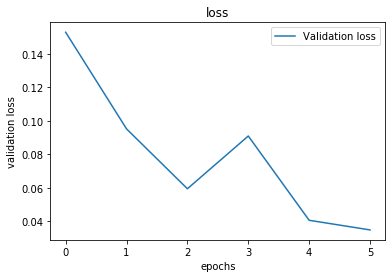

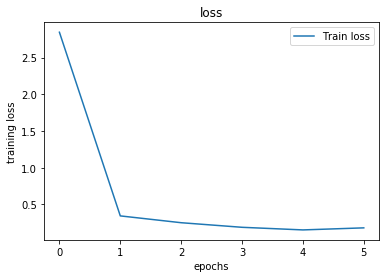

In [54]:
#plt.plot(trainer.train_loss_list)
#plt.show
print(trainer.validation_loss_list)
print(trainer.train_loss_list)
def draw_validation(lst_loss, title):
    plt.plot(lst_loss,label='Validation loss')

   # plt.plot(lst_iter, lst_acc, '-r', label='accuracy')

    plt.xlabel("epochs")
    plt.ylabel("validation loss")
    plt.legend(loc='upper right')
    plt.title(title)

    # save image
   # plt.savefig(title+".png")  # should before show method

    # show
    plt.show()

def draw_train(lst_loss, title):
    plt.plot( lst_loss,label='Train loss')

   # plt.plot(lst_iter, lst_acc, '-r', label='accuracy')

    plt.xlabel("epochs")
    plt.ylabel("training loss")
    plt.legend(loc='upper right')
    plt.title(title)

    # save image
   # plt.savefig(title+".png")  # should before show method

    # show
    plt.show()
draw_validation(trainer.validation_loss_list,"loss")
draw_train(trainer.train_loss_list,"loss")



In [0]:
import torch
import numpy as np
from torch.autograd import Variable
def show(img, a):
    plt.figure()
    if a == 'v':
        npimg = torch.squeeze(img).data.cpu().numpy()
    else:
        npimg = torch.squeeze(img).numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR FOR Prediction: 20.0888 dB
PSNR FOR Noisy: 12.3579 dB


<Figure size 432x288 with 0 Axes>

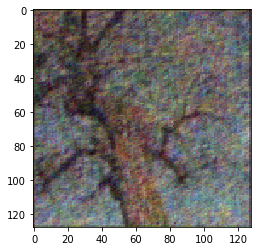

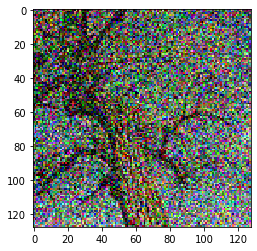

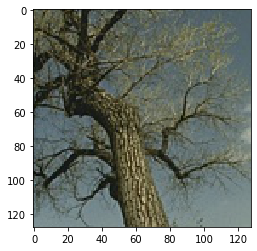

In [64]:
from math import log10

i = 0

criterion = nn.MSELoss()

for _list in dl:
    plt.figure()
   # predic=Variable(_list[0].cuda())
    clean=Variable(_list[-1].cuda())
    pred = m(Variable(_list[0].cuda()))
    noisy=Variable(_list[0].cuda())
    show(pred, 'v')
    show(_list[0], 't')
    show(_list[-1], 't')
    mse=criterion(pred,clean)
    mse2=criterion(noisy,clean)
    psnr=10*log10(1/mse.item())
    psnr2=10*log10(1/mse2.item())
    print("PSNR FOR Prediction: {:.4f} dB".format(psnr))
    print("PSNR FOR Noisy: {:.4f} dB".format(psnr2))

    if i == 0:
        break